# WALMART SALES ANALYSIS

# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

## Loading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\vamshi\OneDrive\Desktop\Walmart_Sales.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Description of features in the dataset

Store - the store number
Date - the week of sales
Weekly_Sales - sales for the given store
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
Temperature - Temperature on the day of sale
Fuel_Price - Cost of fuel in the region
CPI – Prevailing consumer price index
Unemployment - Prevailing unemployment rate

# Data Pre-Processing

In [4]:
# checking for missing values

data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# checking the datatypes of columns

data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
# Converting Date column into Date Type

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [7]:
data['Date'].head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

In [13]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


<Axes: ylabel='Weekly_Sales'>

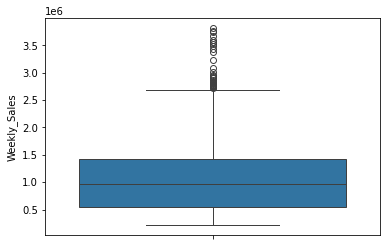

In [14]:
# Checking for outliers in the Weekly_Sales column

sns.boxplot(data['Weekly_Sales'])

In [18]:
# Handling outliers in the Weekly_Sales column using winsorization

from feature_engine.outliers import Winsorizer

winsor_iqr = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = 'Weekly_Sales')

data = winsor_iqr.fit_transform(data)

In [19]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


<Axes: ylabel='Weekly_Sales'>

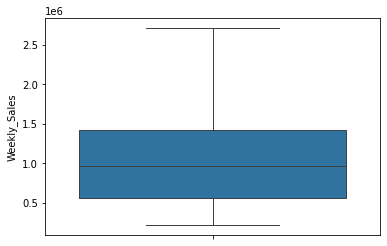

In [20]:
# Checking for outliers in the Weekly_Sales column after winsorization

sns.boxplot(data['Weekly_Sales'])

In [22]:
# checking for number of unique stores

data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [23]:
data['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [24]:
# Creating new features for Analysis

# Create Year and Month columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Calculate weekly average sales for each store
avg_sales = data.groupby('Store')['Weekly_Sales'].mean().reset_index().rename(columns={'Weekly_Sales': 'Average_Weekly_Sales'})

# Merge back to the original data
data = data.merge(avg_sales, on='Store')


In [25]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Average_Weekly_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,1.555264e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,1.555264e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1.555264e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1.555264e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,1.555264e+06


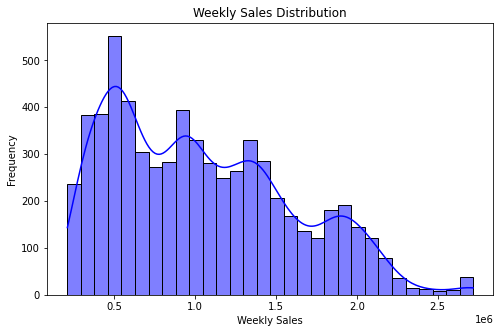

In [26]:
#Uni-variate analysis

#Analysing distributions of numerical variables like Weekly_Sales, Temperature, etc.

# Weekly Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Weekly_Sales'], bins=30, kde=True, color='blue')
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

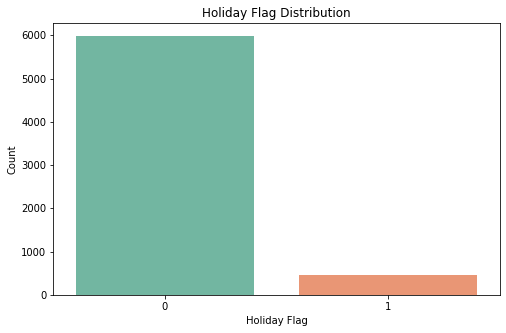

In [27]:
# Holiday Flag Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Holiday_Flag', data=data, palette='Set2')
plt.title('Holiday Flag Distribution')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()

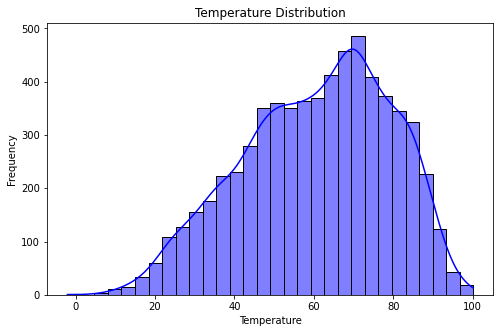

In [32]:
# Temperature Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Temperature'], bins=30, kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

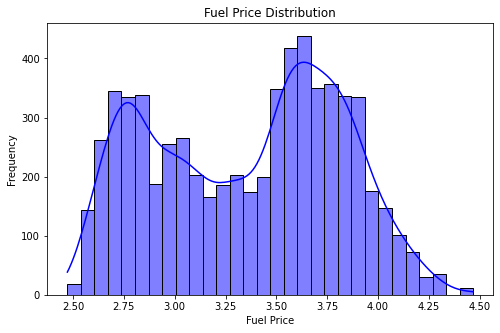

In [34]:
# Fuel-price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Fuel_Price'], bins=30, kde=True, color='blue')
plt.title('Fuel Price Distribution')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')
plt.show()

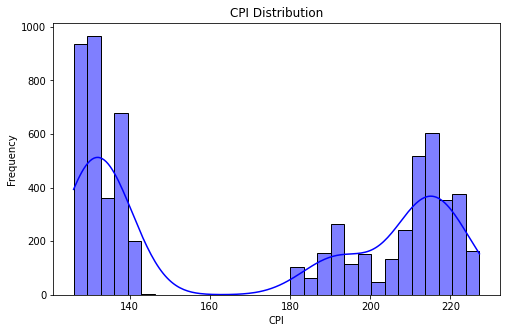

In [35]:
# CPI Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['CPI'], bins=30, kde=True, color='blue')
plt.title('CPI Distribution')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.show()

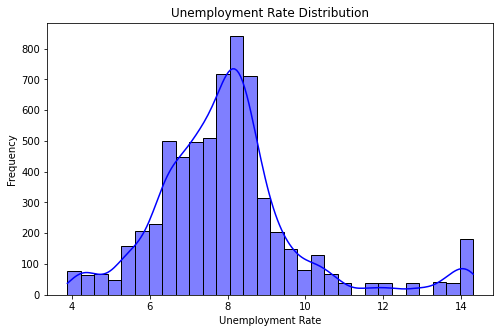

In [36]:
# Unemployment Rate Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Unemployment'], bins=30, kde=True, color='blue')
plt.title('Unemployment Rate Distribution')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

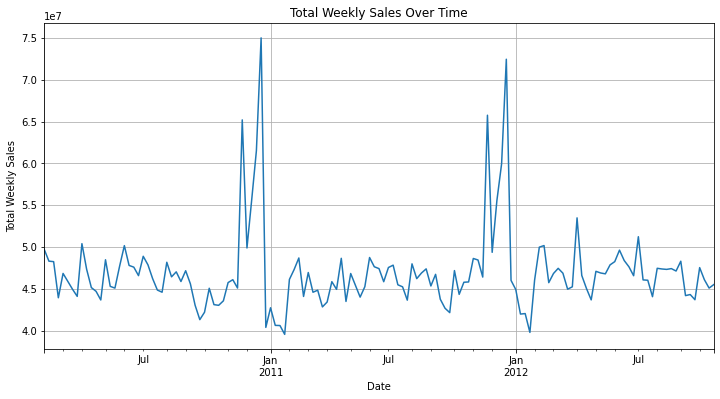

In [37]:
# analysing trends in sales over time

# Group sales by Date
sales_by_date = data.groupby('Date')['Weekly_Sales'].sum()

# Plot time-series sales
plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid()
plt.show()

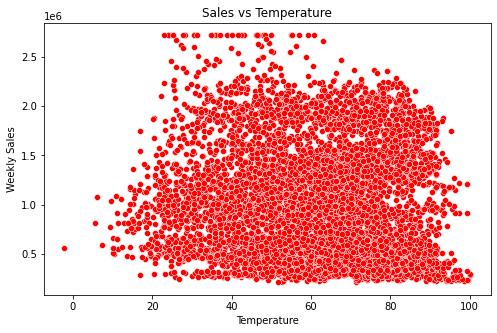

In [38]:
# Bivariate Analysis
# analysing relation between features

# Sales vs Temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, color='red')
plt.title('Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

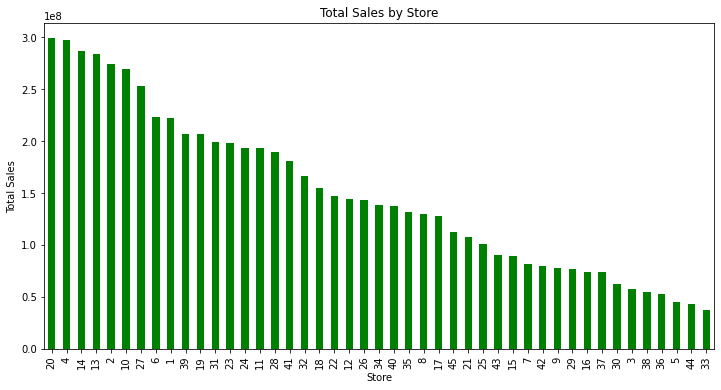

In [39]:
# Sales by Store
plt.figure(figsize=(12, 6))
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

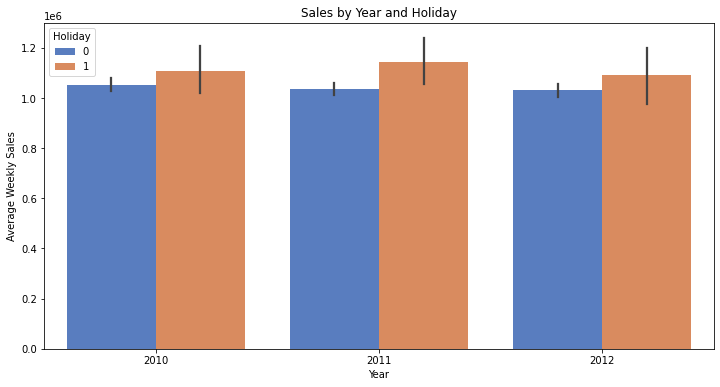

In [40]:
# Multivariate Analysis
# analysing sales based on different variables

# Sales by Year and Holiday
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Weekly_Sales', hue='Holiday_Flag', data=data, palette='muted')
plt.title('Sales by Year and Holiday')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.legend(title='Holiday')
plt.show()

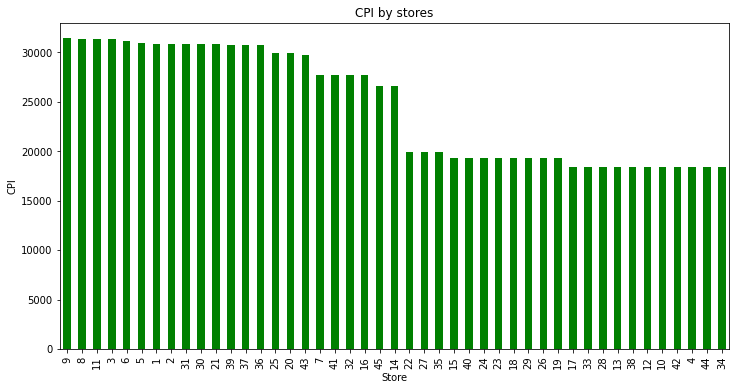

In [46]:
# analysing stores by their CPI values

# CPI by Store
plt.figure(figsize=(12, 6))
store_CPI = data.groupby('Store')['CPI'].sum().sort_values(ascending=False)
store_CPI.plot(kind='bar', color='green')
plt.title('CPI by stores')
plt.xlabel('Store')
plt.ylabel('CPI')
plt.show()

Insights: CPI is a key factor which has effect on sales
When CPI increases (indicating inflation), it generally means that the price of goods and services has increased, 
which reduces consumer purchasing power, inturn reducing sales.

When CPI is low or decreasing, it indicates that inflation is under control, and prices may either rise very slowly 
or even fall, inturn increases or constant consumer purchasing power.

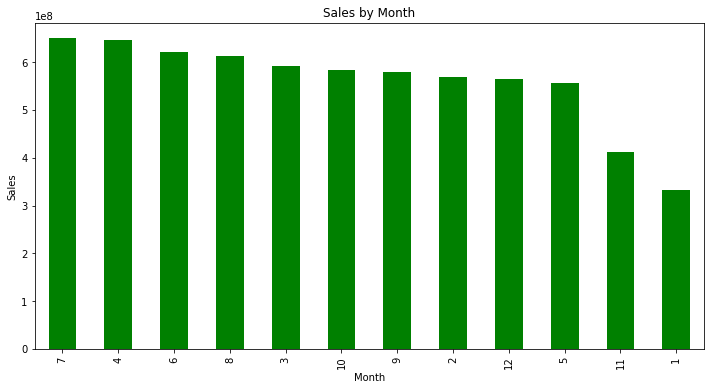

In [49]:
# Analysing sales by Month
plt.figure(figsize=(12, 6))
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False)
monthly_sales.plot(kind='bar', color='green')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

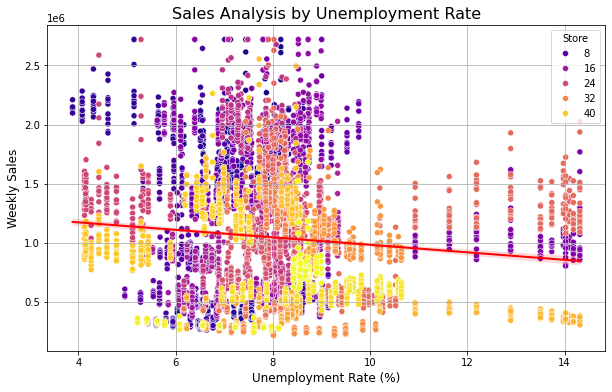

In [54]:
#Analysing sales by Unemployment

# Scatter plot: Weekly Sales vs Unemployment Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales',hue = 'Store', data=data, palette='plasma')

# Fit a linear regression line (optional)
sns.regplot(x='Unemployment', y='Weekly_Sales', data=data, scatter=False, color='red', line_kws={"color": "red", "lw": 2})

# Set the title and labels
plt.title('Sales Analysis by Unemployment Rate', fontsize=16)
plt.xlabel('Unemployment Rate (%)', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()